In [1]:
import numpy as np
from keras import models
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
test_data = pd.read_csv("sign_mnist_test.csv")
train_data = pd.read_csv("sign_mnist_train.csv")

In [3]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
dftrain = pd.DataFrame(train_data)
dftest = pd.DataFrame(test_data)

In [5]:
print(dftrain.shape)
print(dftest.shape)

(27455, 785)
(7172, 785)


In [6]:
Y_train = train_data.label
Y_test = test_data.label

In [7]:
X_test = test_data.copy()
X_train = train_data.copy()
X_test = X_test.drop(['label'], axis=1)
X_train = X_train.drop(['label'], axis=1)

In [8]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(27455,)
(7172,)
(27455, 784)
(7172, 784)


In [9]:
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(25, activation='softmax'))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                25625     
Total params: 829,465
Trainable params: 829,465
Non-trainable params: 0
_________________________________________________________________


In [10]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [11]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.to_numpy()

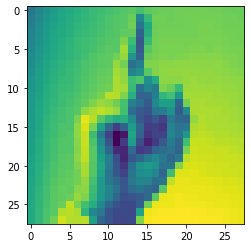

In [12]:
plt.imshow(X_train[0].reshape(28,28))

In [13]:
train_images = X_train.reshape((27455, 28*28))
print(train_images.shape)
print(train_images)
train_images = X_train.astype('float32') / 255
print(train_images.shape)

test_images = X_test.reshape((7172, 28 * 28))
test_images =X_test.astype('float32') / 255

(27455, 784)
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
(27455, 784)


In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(Y_train)
print(train_labels.shape)
print(train_labels)

test_labels = to_categorical(Y_test)
#print(test_labels)
print(test_labels.shape)

(27455, 25)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(7172, 25)


In [15]:
network.fit(train_images, train_labels, epochs=6, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
27455/27455 [==============================] - 5s 181us/step - loss: 2.6353 - acc: 0.2474
Epoch 2/6
27455/27455 [==============================] - 4s 164us/step - loss: 1.7230 - acc: 0.4688
Epoch 3/6
27455/27455 [==============================] - 5s 165us/step - loss: 1.3671 - acc: 0.5690
Epoch 4/6
27455/27455 [==============================] - 5s 169us/step - loss: 1.1262 - acc: 0.6419
Epoch 5/6
27455/27455 [==============================] - 4s 162us/step - loss: 0.9468 - acc: 0.6999
Epoch 6/6
27455/27455 [==============================] - 4s 155us/step - loss: 0.7865 - acc: 0.7494 1s - los


# Convolutional

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [18]:
train_images = X_train.reshape((27455, 28,28,1))
train_images = train_images.astype('float32')/255
test_images = X_test.reshape((7172, 28,28,1))
test_images = test_images.astype('float32')/255

In [19]:
train_labels = to_categorical(Y_train)
print(train_labels.shape)
print(train_labels)

test_labels = to_categorical(Y_test)
#print(test_labels)
print(test_labels.shape)

(27455, 25)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(7172, 25)


In [20]:
model.fit(train_images, train_labels, epochs=7, batch_size=32)

Epoch 1/7
27455/27455 [==============================] - 24s 889us/step - loss: 1.1889 - acc: 0.6319A: 0s - loss: 1.2191 -
Epoch 2/7
27455/27455 [==============================] - 23s 856us/step - loss: 0.1124 - acc: 0.96590s - loss: 0.1143 - ac
Epoch 3/7
27455/27455 [==============================] - 23s 825us/step - loss: 0.0271 - acc: 0.9926
Epoch 4/7
27455/27455 [==============================] - 22s 803us/step - loss: 0.0141 - acc: 0.9965
Epoch 5/7
27455/27455 [==============================] - 22s 819us/step - loss: 0.0089 - acc: 0.99750s - loss: 0.0088 - acc: 0
Epoch 6/7
27455/27455 [==============================] - 24s 878us/step - loss: 0.0063 - acc: 0.9983
Epoch 7/7
27455/27455 [==============================] - 24s 861us/step - loss: 0.0047 - acc: 0.99911s - loss: 0


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

7172/7172 [==============================] - 2s 313us/step
0.923452314556609


In [22]:
my_list = [0, 1, 2, 3, 4, 5, 6, 7,8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [23]:
preds = model.predict(test_images)
print(preds)
print(test_labels)

[[0.00000000e+00 8.26563620e-33 1.91256925e-01 ... 6.16854920e-15
  6.29284513e-10 7.79094659e-28]
 [6.84567282e-33 7.16059301e-09 2.52427897e-25 ... 1.10934844e-08
  9.64759177e-15 9.44785081e-25]
 [0.00000000e+00 5.11357675e-33 2.56831880e-32 ... 1.46901945e-20
  1.29278935e-10 3.66533816e-13]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 7.29384832e-35
  8.07470579e-32 0.00000000e+00]
 [4.90556938e-28 8.33946530e-21 4.68623473e-20 ... 9.90214660e-22
  1.99910518e-22 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.06853986e-35
  1.24437232e-31 0.00000000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [25]:
# from sklearn.metrics import classification_report
# classification_report(test_labels, preds, target_names=my_list)
print(len(preds))

7172


In [26]:
from PIL import Image

In [27]:
im = Image.open('IMG_14.jpg', 'r')
im = im.resize((28, 28), Image.ANTIALIAS)
im = im.convert('L')
# im = im.rotate(-90)

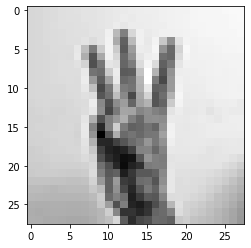

In [28]:
plt.imshow(im, cmap='gray')

In [29]:
pix_val = list(im.getdata())
pix_val = np.asarray(pix_val)
pix_val = pix_val.reshape((1, 28, 28, 1))
pix_val = pix_val.astype('float32')/255
model.predict(pix_val)
o = model.predict_classes(pix_val)
my_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O',
                                                            15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V',
                                                                                    22:'W', 23:'X', 24:'Y'}
print(my_dict[o[0]])

F


In [30]:
pix_val = np.asarray(pix_val)

In [31]:
pix_val = pix_val.reshape((1, 28, 28, 1))
pix_val = pix_val.astype('float32')/255

In [32]:
model.predict(pix_val)

array([[6.1233272e-06, 2.7882337e-04, 3.4595482e-04, 1.2429799e-04,
        4.3855791e-04, 4.0800389e-04, 1.3221559e-02, 4.3748557e-03,
        6.0421793e-04, 5.0879160e-05, 2.4690354e-02, 4.0319611e-04,
        7.5534912e-04, 1.6759903e-05, 1.0632932e-03, 8.1904930e-01,
        1.3791765e-02, 9.3027447e-05, 7.1588857e-03, 1.1500067e-02,
        1.5010535e-03, 3.3782481e-04, 1.9800302e-02, 7.9927094e-02,
        5.8445501e-05]], dtype=float32)

In [33]:
o = model.predict_classes(pix_val)
my_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O',
                                                            15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V',
                                                                                    22:'W', 23:'X', 24:'Y'}
print(o)
print(my_dict[o[0]])

[15]
P
